# 📊 Sierra_leone Solar Data - Exploratory Data Analysis (EDA)
**Author:** Temesgen Awoke  
**Date:** 2025-05-19  

This notebook performs data profiling, cleaning, and exploratory analysis on Sierra_leone's solar dataset as part of the 10 Academy regional project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')

## 📁 Load Dataset

In [2]:
df = pd.read_csv('../my-project/sierraleone-bumbuna.csv')  # replace with actual file name
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


## 🔍 Data Profiling

In [3]:
print('Shape:', df.shape)
df.info()
df.describe()
df.isnull().sum()

Shape: (525600, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB    

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

## 🧼 Data Cleaning

In [5]:
# Convert date column to datetime
#To remove spaces and make things lowercase (for consistency), run:
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Fill missing values (forward fill example)
df.fillna(method='ffill', inplace=True)
# Drop duplicates
df.drop_duplicates(inplace=True)
# Rename columns for clarity
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

['timestamp', 'ghi', 'dni', 'dhi', 'moda', 'modb', 'tamb', 'rh', 'ws', 'wsgust', 'wsstdev', 'wd', 'wdstdev', 'bp', 'cleaning', 'precipitation', 'tmoda', 'tmodb', 'comments']


,timestamp,ghi,dni,dhi,moda,modb,tamb,rh,ws,wsgust,wsstdev,wd,wdstdev,bp,cleaning,precipitation,tmoda,tmodb,comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


## 📈 Exploratory Data Analysis

In [6]:
# Check that the column now exists
print(df.columns)
# Convert to numeric
print(df.columns.tolist())
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())  # See what the cleaned names look like
['timestamp', 'energy_output_(kwh)', 'location']
df.rename(columns={'energy_output_(kwh)': 'energy_output_kwh'}, inplace=True)
if 'energy_output_kwh' in df.columns:
    df['energy_output_kwh'] = pd.to_numeric(df['energy_output_kwh'], errors='coerce')
else:
    print("Column 'energy_output_kwh' not found.")
print(df.columns.tolist())

Index(['timestamp', 'ghi', 'dni', 'dhi', 'moda', 'modb', 'tamb', 'rh', 'ws',
       'wsgust', 'wsstdev', 'wd', 'wdstdev', 'bp', 'cleaning', 'precipitation',
       'tmoda', 'tmodb', 'comments'],
      dtype='object')
['timestamp', 'ghi', 'dni', 'dhi', 'moda', 'modb', 'tamb', 'rh', 'ws', 'wsgust', 'wsstdev', 'wd', 'wdstdev', 'bp', 'cleaning', 'precipitation', 'tmoda', 'tmodb', 'comments']
['timestamp', 'ghi', 'dni', 'dhi', 'moda', 'modb', 'tamb', 'rh', 'ws', 'wsgust', 'wsstdev', 'wd', 'wdstdev', 'bp', 'cleaning', 'precipitation', 'tmoda', 'tmodb', 'comments']
Column 'energy_output_kwh' not found.
['timestamp', 'ghi', 'dni', 'dhi', 'moda', 'modb', 'tamb', 'rh', 'ws', 'wsgust', 'wsstdev', 'wd', 'wdstdev', 'bp', 'cleaning', 'precipitation', 'tmoda', 'tmodb', 'comments']


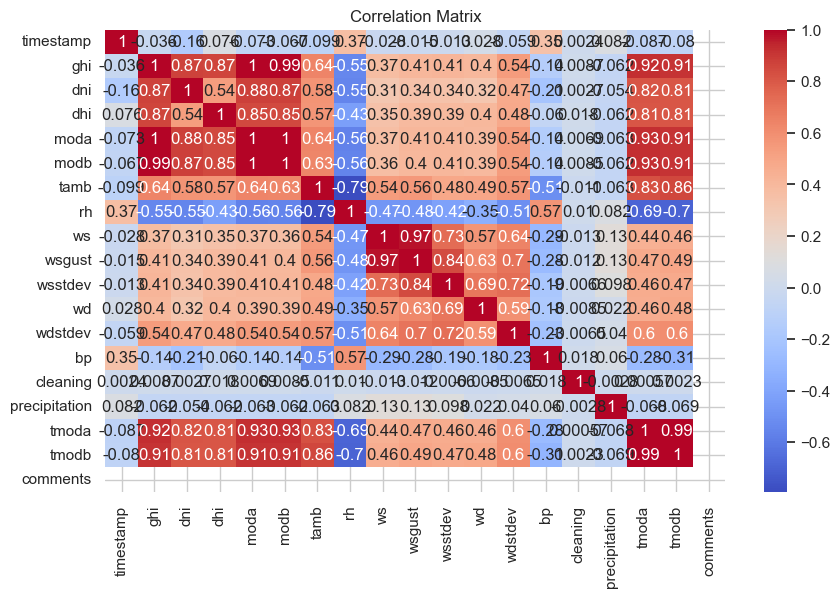

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

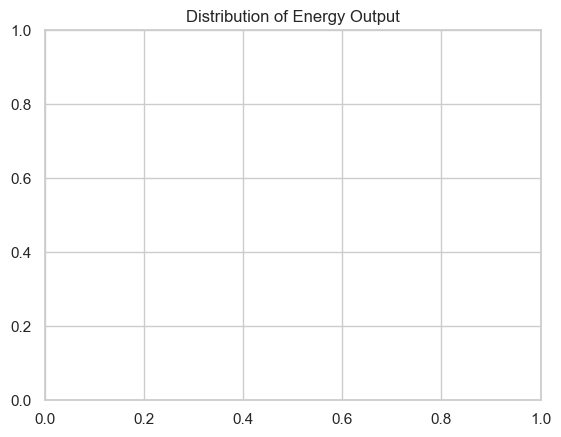

In [9]:
plt.title('Distribution of Energy Output')
plt.show()

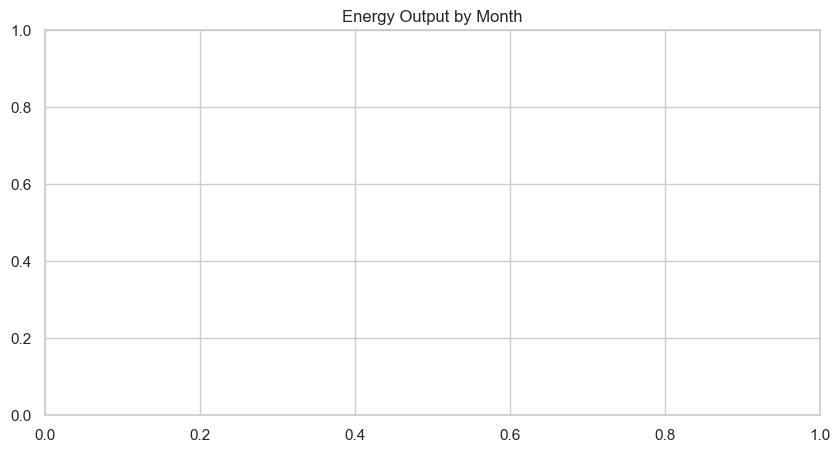

In [10]:
df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour
plt.figure(figsize=(10,5))
plt.title('Energy Output by Month')
plt.show()

## 💾 Save Cleaned Dataset

In [11]:
df.to_csv('../my-project/cleaned_sierraleone-bumbuna.csv', index=False)

## ✅ Summary of Insights
- Dataset shape and time range
- Missing values handled using forward fill
- Daily and monthly production trends observed
- Ready for comparison with benin and Togo datasets